<a href="https://colab.research.google.com/github/manudwd/Classification--preprocessing-data-/blob/main/NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#what is a classification problem?
binary classification- aka one thing or another ex spam or not spam

Multiclass classification- more  than one thing or another aka is this photo x,y,z,p, or q?

Multilabel Classification- ex what tags some article to have??
Aka multiple label options per sample



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#topics to cover here
1.Architecture of a neural ntwrk classification model

2.input shapes and output shapes of a classification model (features and labels)

3.Creating custom data to view and fit
steps in modelling 
aka creating,compiling,fiting, and evaluating model

4.Different classification evaluation methods

5.Saving and loading models

Classification inputs nad outputs

photo classified to be something or another

inputs and output shapes of our image classification will follow the metrics of first fitting the image in a particular size say 224x224 and has a colour channel of 3 aka rgb 

important parameter for classifying shapes is batch size, width, hieght and colourchannel for an image
shape=[batchsize,width,hieght,colour channel]
32 is a common batch size aka 32 images at one time

output shape is 3, for a classification to shushi,pizza,and meat

#remember that with your problem changing your input and output sahpe will cahnge as well. a text classification won't have width height and colour channel, but maybe just a batch size, and string size


##creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000
#create crices
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
#checkout features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [ ]:
#checkout labels
y[:10],y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]), (1000,))

data is hard to understand right now

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


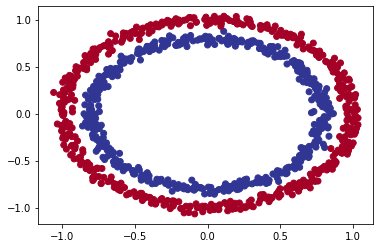

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

#input and output shapes of NN

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
#next steps in modelling are again to classify the model by building
import tensorflow as tf

tf.random.set_seed(42)
#build the model

model_1=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#FIT THE MODEL
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 993us/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
#try trainin for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
#50% accuracy is basically guessing so we'll add anothehr  layer
tf.random.set_seed(42)
#build the model

model_2=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

#compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#FIT THE MODEL
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:

model_2.evaluate(X,y)

32/32 [==============================] - 0s 987us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

#loss is about the same and acc is still 50%

#improving the model


when creaitng model-
we may increase layers
add hidden unit, and change activation

when comipling 
we may use diff optmizer

when fitting-
we  may change how long we  training our  model for 

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

#visualize the predictions and understand  how the predictions are plotted  against truth grounds

*take the trained modell features (x) mad labels (y)

*create meshgrid of the different X values

*make predicitons acrsoos the mesh grid

*plot the predictions as well as a line btw zones where each unique class falls

In [ ]:
#we make a function to plot agianst our data
import numpy as np
def plot_decision_boundary(model,X,y):
  #plots the decision boundary created by a mdoel predicitng on X

  #define the acis boundaries of the plot and create a meshgrid

  x_min,x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1, X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))
  
  #create X value (w're doing to make predicitons on these)
  x_in=np.c_[xx.ravel(),yy.ravel()]
  #make predicitons
  y_pred=model.predict(x_in)

  #check for multiclass
  if len(y_pred[0])>1:
         print("doing multillass classification")
         #we have to reshape our prediciton t ge tthem ready for plotting
         y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
           print("doing binary classification")
           y_pred=np.round(y_pred).reshape(xx.shape)

      #plot the decision boundary
  plt.contourf(xx, yy, y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


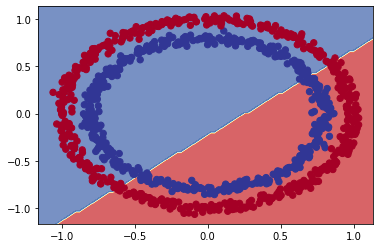

In [ ]:
#check out t he prediction your model 
plot_decision_boundary(model=model_3,
                        X=X,
                        y=y)

#it seems like your stupid fucking nnc is plotting according to a regression problem 

In [ ]:
tf.random.set_seed(42)

X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) #y=X+100

#split data into trainin and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

#fit our model
#model_3.fit(X_reg_train,y_reg_train,epochs=100)

#shit you're  stupid cause it o wn't wokr cause  we  rae working on a  regression prolblem

In [ ]:
#setup the random seed
tf.random.set_seed(42)

#create
model_4=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])
#compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
#fit
model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

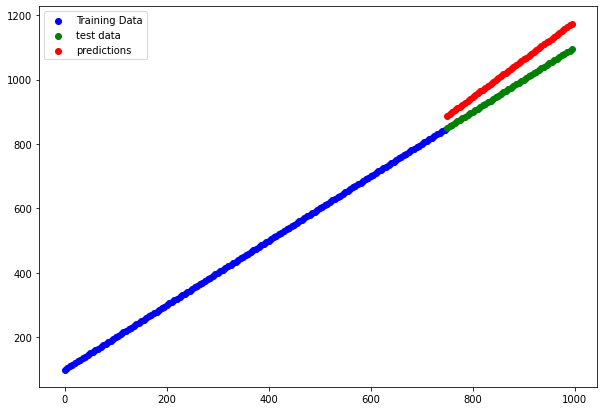

In [ ]:
#amke  predicitons with our trained model
y_reg_preds=model_4.predict(X_reg_test)

#plot models prediciton against prediciton data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="test data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="predictions")
plt.legend()

#we  haven't introduced non linearity

In [ ]:
tf.random.set_seed(42)
#create
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
                             
])
#compile
model_5.compile(loss=["binary_crossentropy"],
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#fit the bodel
history=model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

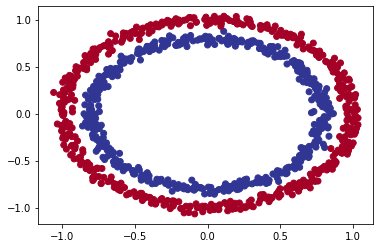

In [ ]:
#check th data again
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


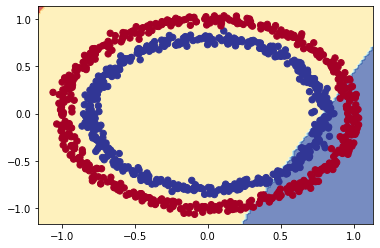

In [ ]:
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [ ]:
#lets try with non-linear activation ReLU this time
tf.random.set_seed(42)
#create
model_6=tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
#compile
model_6.compile(loss=["binary_crossentropy"],
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#fit
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 990us/step - loss: 3.5803 - accuracy: 0.4409
Epoch 1

#still shiet

In [ ]:
tf.random.set_seed(42)
#create
model_7=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])
#compile
model_7.compile(loss=["binary_crossentropy"],
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#fit
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

#what a dog shit mode mate, go eat shit

doing binary classification


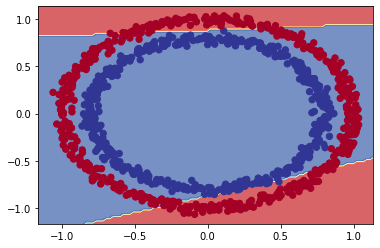

In [ ]:
plot_decision_boundary(model=model_7,
              X=X,
              y=y)

#god what the fuck is this shit

In [ ]:
tf.random.set_seed(42)
#create
model_8=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
#compile
model_8.compile(loss=["binary_crossentropy"],
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#fit
history=model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

doing binary classification


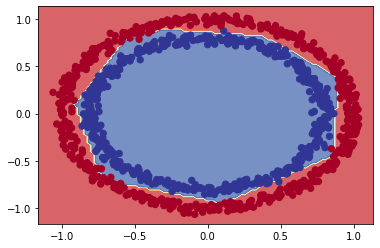

In [ ]:
plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

#go fuck yourself now you stupid fucking circle

In [ ]:
model_8.evaluate(X,y)

32/32 [==============================] - 0s 990us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

#Is your model really prediciting correctly? what did the model learn on and what data did we predict on

Thats right you idiot. you stupid fucker.

#the combination of linear and non linear functions is one of the key fundamentals of neural network

Now  we've discussed inear and nonlinear functions 

In [ ]:
#create a toy tensor similiar to what we passed into our model
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

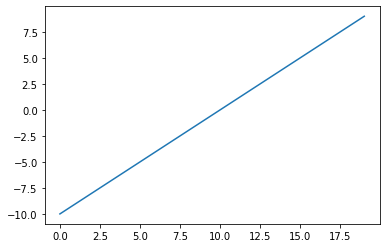

In [ ]:
plt.plot(A)

In [ ]:
#lets replicate sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

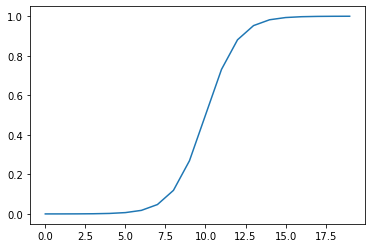

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
#lets try relu function
def relu(x):
  return tf.maximum (0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

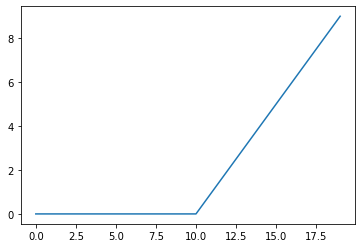

In [ ]:
plt.plot(relu(A))

#the idea is that
the non linear lines essentially allow to full grasp a non linear data
it's a very simple idea of how the lines may interact with something. on paper it sounds very simple however that is the premise of all the activation functions

Evaluating and improving our  classification

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train= X[:800], y[:800]
X_test, y_test=X[800:],y[800:]

X_train.shape, y_train.shape

NameError: ignored

In [ ]:
#let's recreate the model

tf.random.set_seed(42)
#create
model_9=tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")                        
])
#compile
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
#fit
history=model_9.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [ ]:
#evaluate
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


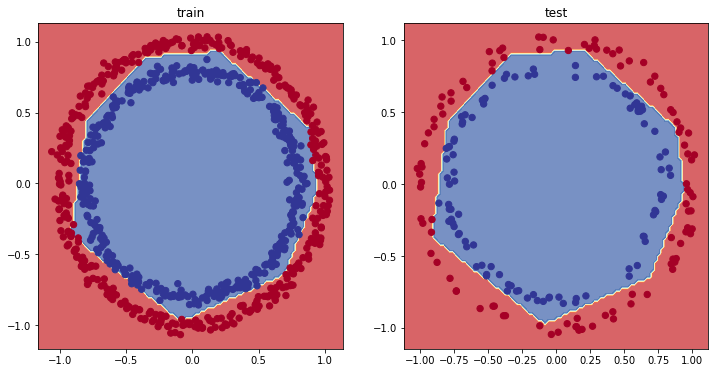

In [ ]:
#plot b oth for training and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model=model_9,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model_9,
                       X=X_test,
                       y=y_test)
plt.show()


#now let's use that history fucker variable we've been writing all along also, plotting loss curves


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'model_8 loss curver')

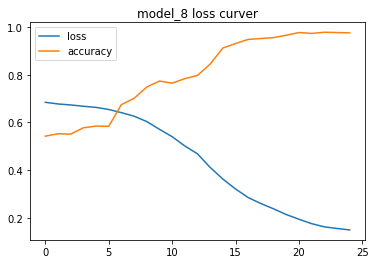

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curver")


#for many function loss going down = model improving

#now finding that stupid ideal learning rate god fuck this shit

aka where the loss increases the most during training we use the following state
 1. using callback- is an extra functionality you can use while training 
 2. Another model
 3. modified loss curve plot
 4. fuck me running
  

In [ ]:
tf.random.set_seed(42)

#create
model_10=tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#fit the damn thing for  fuck sake
#sike you thought bitch call back first
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#fit the fucker
#some quick trivia for u bitch, you can pass multiplel call backs at
#same time
history_10=model_10.fit(X_train, y_train, epochs=100, 
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

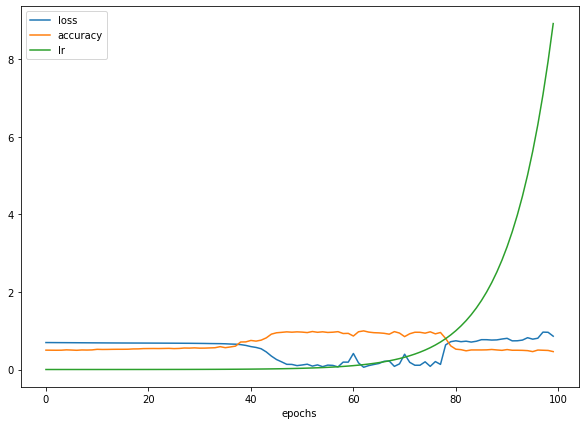

In [ ]:
#check the history again
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs")

Text(0, 0.5, 'learning rate vs loss')

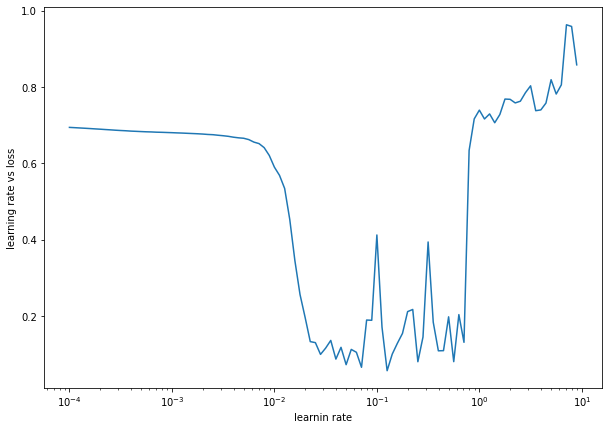

In [ ]:
#plot lr vs loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("learnin rate")
plt.ylabel("learning rate vs loss")

#got some fat fucking info for you lad,the ideal LR is where in the curve above where the loss is still decreasing but not flattened out, usually 10 times smaller than the bottom of the curve

In [ ]:
#example of other typical learning rate 1, 0.1, 0.001, 0.0001
#here lets try for lr 0.02

tf.random.set_seed(42)

#create
model_11=tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])
#fit
history_11=model_11.fit(X_train,y_train, epochs=20)#lets try with less epochs



Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

In [ ]:
#evaluate
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

doing binary classification
doing binary classification


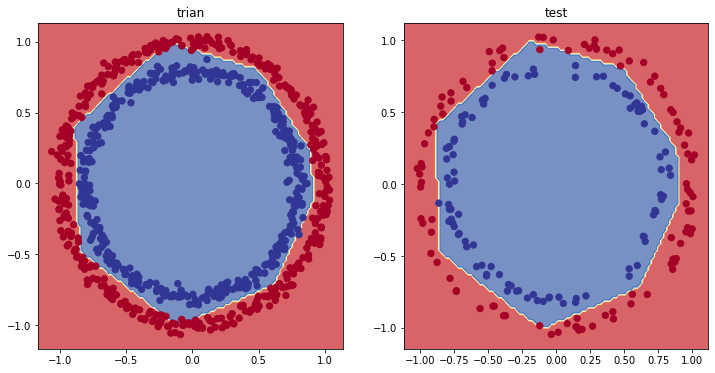

In [ ]:
#here we saw that at lr 0.02 the graph of loss was still falling 
#leading us to assume that it could be the right place
#basically understand  trial and error

#now plot the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("trian")
plot_decision_boundary(model=model_11, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model_11,X=X_test,y=y_test)

#more evaluation methods for classifcaiton models

1. accuracy- tp+tp/(tp+tn+fp+fn)
  it is the default metrics for classification however it doesn't work well, when there are imbalanced classes. aka, when theres a sample of 1000 from one class and 10 from other, it may just say everything is class 1, just as you would normally view the accuracy. Accuracy doesn't mean precise.

2. Precision- tp/(tp+fp)- higher precision leads to less false positives, precision is sometimes,better than accuracy.

3. Recall- tp/(tp+fn)- higher recall leads to less false negtives

4. F1-Score-precision.recall/(precision+recall)- combination of prec and recal usually a good overall etric for classification model

5. confusion matrix- no formula, custom function, or sklearn.mterics.comfusion_matrix() - when comparing predictions ot truth labels to see where mdeol gets confused. Can be hard to use with large number of classes.

#precision and recall 
precision and recall ahve their trade off where increasing one decreases the other

#more classification evaluation methods

alongside visaulizing our models results as much as possible, ther eare handful of other classication evaluation methods and metrics you should be familiar with:

Accuracy

Precision

Recall

F1-score

confusion matrix

Classification report from sci-kit 
learn



In [ ]:
#check the accuracy of our model
loss,accuracy=model_11.evaluate(X_test,y_test)
loss, accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


(0.05740181356668472, 0.9900000095367432)


#how  about confusion matrix

#like punett square the confusion matrix uses square matrix's to predict outcomes

on the y axis is truth label and x axis the predicted label, across the diagonals we get the correct predictions aka true +Ve and true -ve



In [ ]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
#make predictions
y_preds=model_11.predict(X_test)
#create confusion matrix
confusion_matrix(y_test,y_preds)

NameError: ignored




opps fucked up, value error cause test is binary pred isn't

ie, test has come out in prediction probablity form, the standard output from sigmoid (or softmax) activation functions



In [ ]:
#convert prediction probablities to binary format and view the first 10

tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#create confusion matrix again
confusion_matrix(y_test,tf.round(y_preds))

NameError: ignored

#the diagnoal here is for the right value of accuracy but this isn't making a whole lot of sense

In [ ]:
#making this a little more pretty

#remix of scikit_learn plot confusion matrix

import itertools

figsize=(10,10)
#create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize confusion matrix
n_classes=cm.shape[0]

#lets prettify
fig,ax=plt.subplots(figsize=figsize)
#create matrix plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes=False
if classes: 
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#labels the axes
ax.set(title="confusion matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#set threshold ofr different colours
threshold=(cm.max()+cm.min())/2.

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

NameError: ignored

In [ ]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

#fuck it multiclass classification

#when you have more than two class as an options its multiclass

In [ ]:
#classify items of differnet set fashion_mnist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#data in this data set has already been seorted into training and tests sets
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#show the first training ex
print(f"training sampel:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")


training sampe:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

255

In [ ]:
#label 9 is  for ankle boot for example

#check s hape
train_data[0].shape,train_labels[0].shape

((28, 28), ())

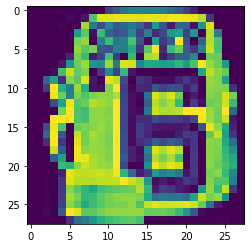

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt 
plt.imshow(train_data[6000])


In [ ]:
#check out the sample label
train_data[0].shape

(28, 28)

In [ ]:
class_names=["tshirt/top","trousers","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"] 

In [ ]:
len(class_names)


10

Text(0.5, 1.0, 'bag')

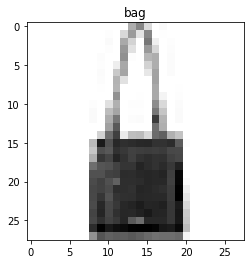

In [ ]:
#plot an example image its label
index_of_choice=200
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

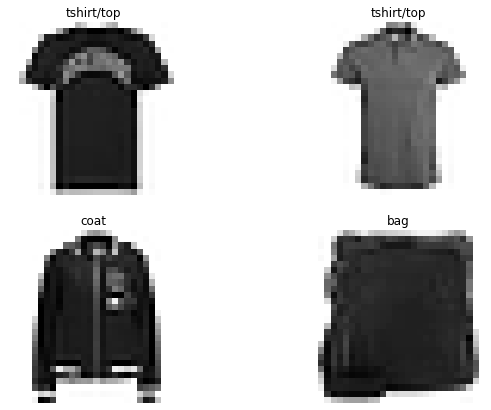

In [ ]:
#we need to be  able to plot this data randomly

import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax=plt.subplot(2, 2, i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


In [ ]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#similar tools for multiclassifcation model, we can use smilar achtictecutre 
#as our binary classifcaition we're going to have to tweak a few things
#input shape=28x28 size of one image
#output shape 1 per class, so 10
#loss function=tf.keras.losses.caterogricalcross entropy
#output layer activation= softmax()

tf.random.set_seed(42)
#create
model_12=tf.keras.Sequential([
#why we flatten is because neural networks like data in singal linear stack
                              tf.keras.layers.Flatten(input_shape=(28,28)),
#you will get value error if you don't flatten
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])

#compile
#using categorical corss entropy is one when you use one hot encoded data
#use sparse categorical cross entropy when integers 
#if you don't want to use sparecategorical you can one hot your train 
#and test labels with tf.one_hot(train/test_labels, depth=10)
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )
non_norm_history=model_12.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data,test_labels))
#validation_data is validation data set, since we don't ahve a particular
#validation data we use the test data instead

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8192 - accuracy: 0.1345 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7426 - accuracy: 0.2323 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2837 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2888 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.3031 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.3078 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5668 - accuracy: 0.3213 - val_loss: 1.5695 - val_accuracy:

In [ ]:
#what the f uck is validation  data?
#check the model summary

model_12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#here we got training and data, normally uou'd hve to do it yourself
#aka convert to tensor, normalize it, set in the right shape



Neural network prefer data to be scaled this means they like to have numbers in tesors between 0 and 1

In [ ]:
#we can get that by dividing by the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#now the data is nroamlized we do the same shit again
tf.random.set_seed(42)
#create
model_13=tf.keras.Sequential([
#why we flatten is because neural networks like data in singal linear stack
                              tf.keras.layers.Flatten(input_shape=(28,28)),
#you will get value error if you don't flatten
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])

#compile
#using categorical corss entropy is one when you use one hot encoded data
#use sparse categorical cross entropy when integers 
#if you don't want to use sparecategorical you can one hot your train 
#and test labels with tf.one_hot(train/test_labels, depth=10)
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )
#fit the model
norm_history=model_13.fit(train_data_norm,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

#neural network tend to prefer data in numerical and scaled/normalzied

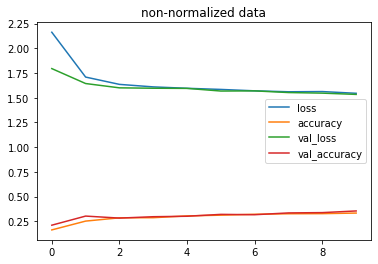

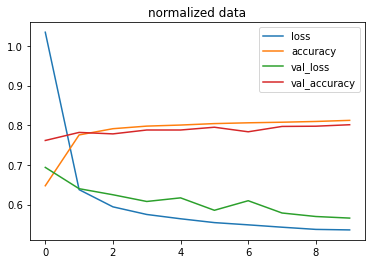

In [ ]:
import pandas as pd 
#plot non normalized data loss curver
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")
#plot normalized data
pd.DataFrame(norm_history.history).plot(title="normalized data")


#Same models with different data can produce very different results. So when comparing them, it's important to make sure you're comparing them to the same criterion(same architecture but different data or same data but different architecture)


In [ ]:
#finding the ideal learning rate
tf.random.set_seed(42)
 #create
model_14=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
  #compile
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#create learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#fit
find_lr_history=model_14.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm,test_labels),
                             callbacks=[lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'finding ideal lr')

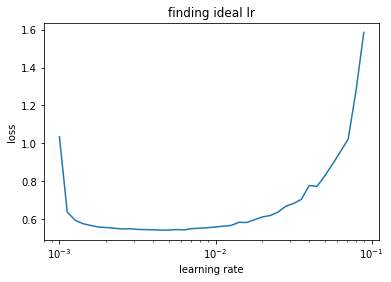

In [ ]:
#plot lr decya curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding ideal lr")

In [ ]:
#now the data is nroamlized we do the same shit again
tf.random.set_seed(42)
#create
model_15=tf.keras.Sequential([
#why we flatten is because neural networks like data in singal linear stack
                              tf.keras.layers.Flatten(input_shape=(28,28)),
#you will get value error if you don't flatten
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")
])

#compile
#using categorical corss entropy is one when you use one hot encoded data
#use sparse categorical cross entropy when integers 
#if you don't want to use sparecategorical you can one hot your train 
#and test labels with tf.one_hot(train/test_labels, depth=10)
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )

#fit the model
history_15=model_15.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

#evaluate the multiclass  m odel

to evaluate our multiclass model
1. evaluate its perforamce using other classification matrix
 (such as confusion matrix)
2. asses some of its predictions (through visualizations)
3. save and export for application

lets go through top 2

In [ ]:
#create confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

 
def make_confusion_matrix (y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  #create the confusion matrix
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize confusion matrix
  n_classes=cm.shape[0]

  #lets prettify
  fig,ax=plt.subplots(figsize=figsize)
  #create matrix plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

#set labels to be classes
  if classes: 
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #labels the axes
  ax.set(title="confusion matrix",
        xlabel="predicted label",
        ylabel="true label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  #set x-axis labels to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold ofr different colours
  threshold=(cm.max()+cm.min())/2.

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=15)

In [ ]:
class_names

['tshirt/top',
 'trousers',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [ ]:
y_probs=model_15.predict(test_data_norm) #probs is for prediciton probablities

#view  the  first 5
y_probs[:5]


array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'ankle boot')

#here we see that the last index has the highest value aka our model thinks it the item with the index 9 which is the ankle boot

In [ ]:
#convert all the prediction probablities into integers
y_preds=y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

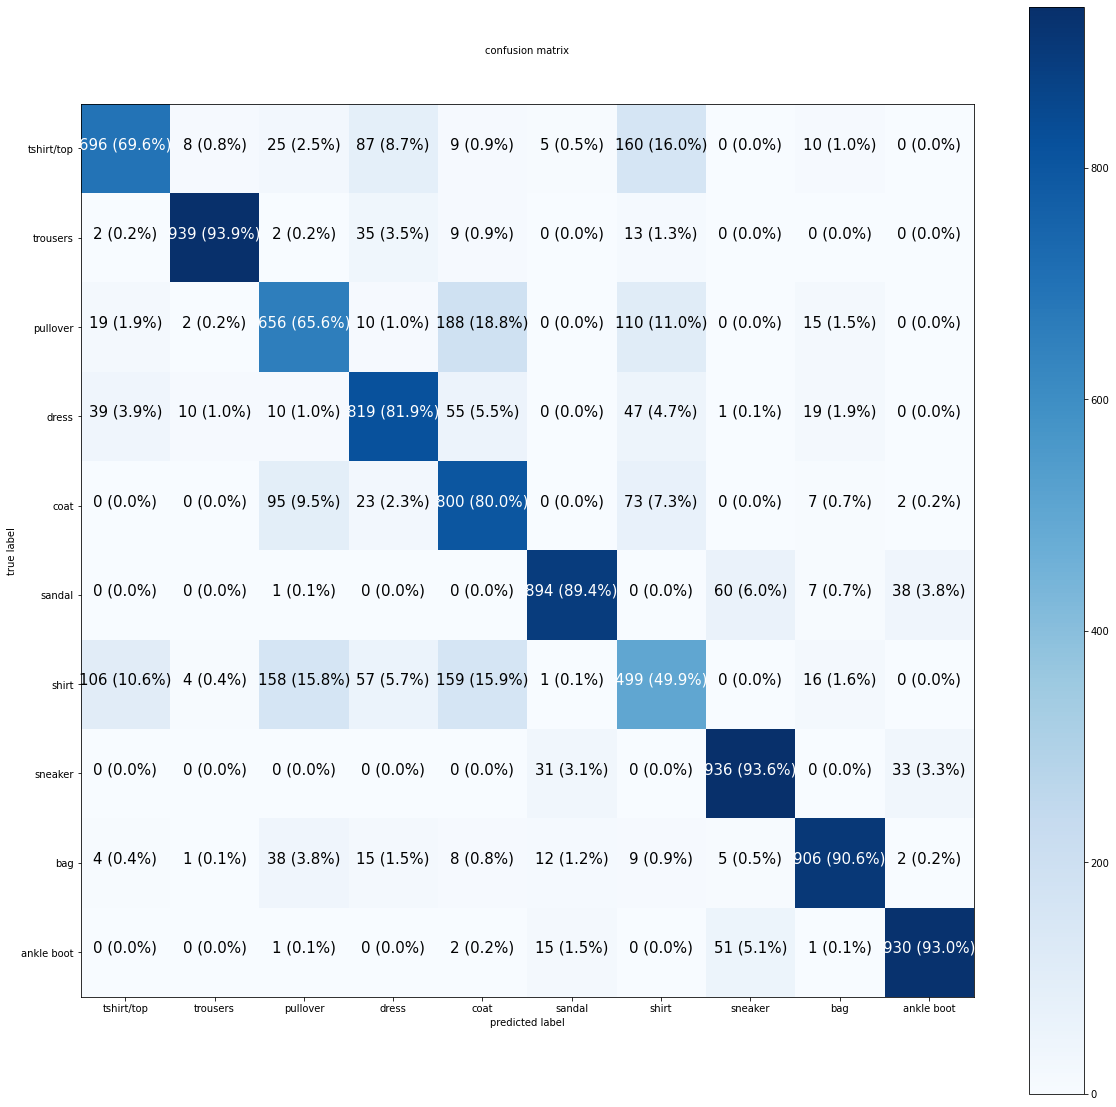

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,20),
                      text_size=10)

#fucking visualize if your data is image based

plot random image
make prediction o n  said  image
label the plot with the truth label and the predicted label



In [ ]:
import random

def plot_random_image(model, images, true_labels,classes):
  """
  pick a random  image plots it  and labels it with a  prediction and truth label
  """
  #set up the random integger
  i=random.randint(0,len(images))

  #craete prediction and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the colour of the titles depending on if the prediciton is right or wrogn
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  #add xlabe information (predictions/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label), 
             color=color)#set colour to green or red based on pred_label
  

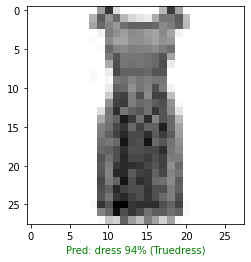

In [ ]:
#check out our random image as well its prediction
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

#what kidn of pattern is our models actually learning 


In [ ]:
#find the  layers of our most recent model
model_15.layers

In [ ]:
#extract a particular layer by indexing
model_15.layers[1]

In [ ]:
#get the patterns of a layre in our network
weights, biases=model_15.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [ ]:
#now lets check our bias vector
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

#for every hidden unit there's one bias vectore

each of these is paired iwth weight matrix

bias vector is also initialized as zeros atleast in the case of tensorflow dense layer. 

the bias vector dictates how much the patterns  within the corresponding weights matrix should influence the next layer 


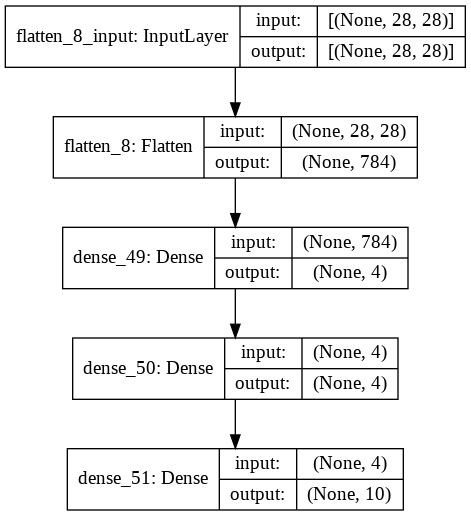

In [ ]:
#lets check out another way of viewing deep learning models
from tensorflow.keras.utils import plot_model
#see the input and output of each layer
plot_model(model_15,show_shapes=True)